<a href="https://colab.research.google.com/github/Intertangler/ML4biotech/blob/main/logistic_regression_exercise_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## exercise - logistic regression
In this exercise we will look again at simulated data linking blood sugar levels, the pathological occurence of diabetes, and gene expression data for high risk individuals. In contrast to the previous exercise, we will be attempting to construct a classifier using logistic regression that uses the
gene expression profiles of individuals to predict whether or not they receive
the pathological label.

In [ ]:
%load_ext rpy2.ipython

In [ ]:

%%R

#First, let's import some multidimensional data and have a look at it. We will be
#using dataframes - basically like excel spreadsheets, with columns and rows.
#Try printing out the dataframe to examine its contents and its header labels.

library(readr)

# Read the data from the GitHub URL
url = "https://raw.githubusercontent.com/Intertangler/ML4biotech/main/gene_expression_data.csv"

df <- read_csv(url)

# Extract data to the appropriate variables
all_samples <- as.matrix(df[,-(ncol(df)-1):-(ncol(df))])
pathological_labels <- df$Pathological
blood_sugar_levels <- df$Blood_Sugar
expression <- all_samples


Rows: 2000 Columns: 402
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (402): 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
%%R
#take a look at the dataframe
print(colnames(df))
print(df)

  [1] "0"            "1"            "2"            "3"            "4"           
  [6] "5"            "6"            "7"            "8"            "9"           
 [11] "10"           "11"           "12"           "13"           "14"          
 [16] "15"           "16"           "17"           "18"           "19"          
 [21] "20"           "21"           "22"           "23"           "24"          
 [26] "25"           "26"           "27"           "28"           "29"          
 [31] "30"           "31"           "32"           "33"           "34"          
 [36] "35"           "36"           "37"           "38"           "39"          
 [41] "40"           "41"           "42"           "43"           "44"          
 [46] "45"           "46"           "47"           "48"           "49"          
 [51] "50"           "51"           "52"           "53"           "54"          
 [56] "55"           "56"           "57"           "58"           "59"          
 [61] "60"           "61"   

https://community.rstudio.com/c/tidyverse

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




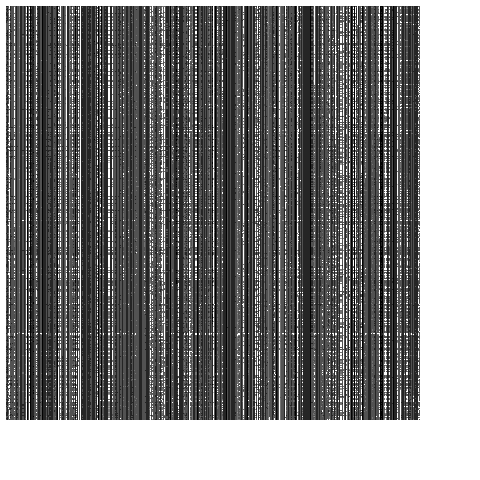

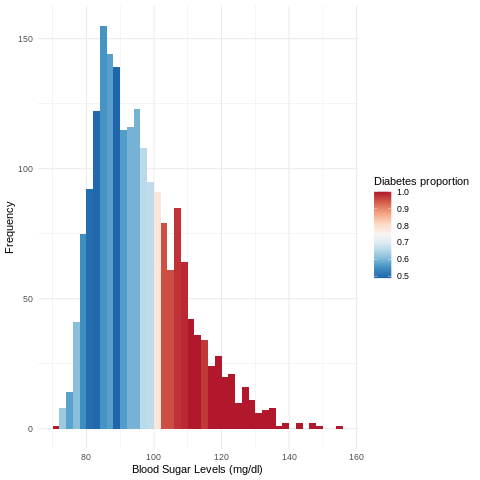

In [ ]:
%%R
# Next, let's run a visualization of our data. First a matrix displaying genes vs
# individuals in our dataset, with the brightness of each pixel indicating the
# expression level. Then we will make a histogram showing the distribution of
# blood sugar levels in our dataset. In addition, we will color each bar according
# to the frequency of patients who develop diabetes later in life - the longitudinal
# part of this data.

library(ggplot2)
library(dplyr)
library(RColorBrewer)



heatmap(as.matrix(log(df %>% select(-Pathological, -Blood_Sugar))), Rowv = NA, Colv = NA, scale="none", col = brewer.pal(9, "Greys"), labRow = NA, labCol = NA)


num_bins <- 50
hist_data <- hist(blood_sugar_levels, breaks = num_bins, plot = FALSE)



bin_labels <- cut(blood_sugar_levels, breaks = hist_data$breaks, include.lowest = TRUE, labels = FALSE)
proportions <- sapply(1:length(hist_data$counts), function(i) mean(pathological_labels[bin_labels == i]))


colormap <- colorRampPalette(brewer.pal(9, "RdBu"))
bin_colors <- colormap(length(proportions))


ggplot() +
  geom_bar(aes(x = hist_data$mids, y = hist_data$counts, fill = proportions), stat = "identity", width = diff(hist_data$breaks)[1]) +
  scale_fill_gradientn(colors = rev(bin_colors), name = "Diabetes proportion") +
  labs(x = 'Blood Sugar Levels (mg/dl)', y = 'Frequency') +
  theme_minimal()


## exercise - correlation analysis on the linear regression results
Last time we performed linear regression on the data to build a model that can
predict the blood sugar levels on the basis of the gene expression profiles of
each individual. When we plot the results, we see a visual trend. How does the model perform when we train it on genes with greater or lesser correlation with blood sugar?

In [ ]:
%%R
#install.packages("optimx")
install.packages("caret")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpXJ1cbC/downloaded_packages’



[1] "Genes with high correlation with blood sugar level: 1, 2, 6, 10, 11, 21, 26, 27, 30, 31, 32, 36, 37, 38, 42, 45, 47, 52, 60, 69, 74, 80, 81, 82, 85, 86, 87, 92, 96, 102, 105, 107, 118, 125, 129, 140, 142, 145, 148, 151, 154, 156, 159, 164, 167, 170, 172, 175, 178, 180, 182, 185, 186, 187, 189, 192, 193, 194, 200, 203, 204, 205, 208, 210, 211, 213, 222, 226, 238, 243, 244, 250, 252, 253, 256, 257, 260, 261, 270, 280, 285, 286, 288, 289, 292, 305, 306, 311, 313, 316, 320, 322, 329, 331, 333, 335, 337, 343, 345, 346, 349, 350, 361, 363, 374, 376, 377, 378, 379, 390, 393, 396"
[1] "Genes with low correlation with blood sugar level: 3, 7, 8, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 25, 28, 29, 34, 35, 39, 40, 43, 44, 46, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 83, 84, 88, 89, 90, 91, 93, 94, 95, 97, 98, 99, 100, 101, 103, 104, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 121, 123, 124, 126, 127, 128, 130, 

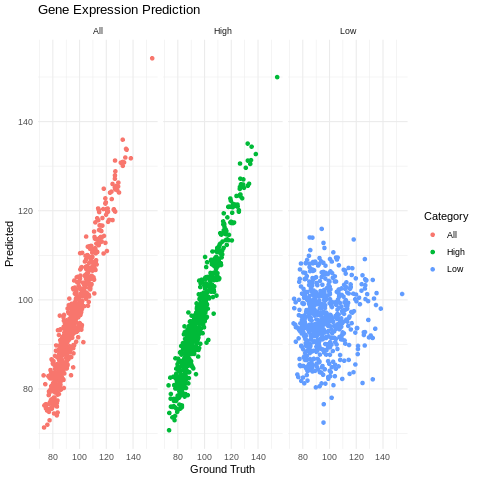

In [ ]:
%%R

library(ggplot2)
library(caret)

# Calculate Pearson Correlation
calculate_pearson_correlation <- function(x, y) {
  #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟# mean of first variable
  #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟# mean of second variable
  mean_x <- mean(x)
  mean_y <- mean(y)
  # #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟# Calculate the numerator and the denominator terms for Pearson correlation
  #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
  #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟#
  numerator <- sum((x - mean_x) * (y - mean_y))
  denominator_x <- sqrt(sum((x - mean_x)^2))
  denominator_y <- sqrt(sum((y - mean_y)^2))
  # #🌟🌟🌟🌟 YOUR CODE HERE 🌟🌟🌟🌟# Calculate Pearson correlation
  corr <- numerator / (denominator_x * denominator_y)
  return(corr)
}


high_corr_genes <- c()
low_corr_genes <- c()

if (is.null(ncol(expression))) {
  stop("The 'expression' data frame appears to be empty or not loaded properly.")
}

genes <- ncol(expression)


for (i in 1:genes) {# Loop over all the genes
  gene_expression <- expression[, i]
  corr <- calculate_pearson_correlation(blood_sugar_levels, gene_expression)
  if (abs(corr) > 0.1) {
    high_corr_genes <- c(high_corr_genes, i)
  } else if (abs(corr) < 0.05) {
    low_corr_genes <- c(low_corr_genes, i)
  }
}


print(paste("Genes with high correlation with blood sugar level:", toString(high_corr_genes)))
print(paste("Genes with low correlation with blood sugar level:", toString(low_corr_genes)))

# fitting to get weights by using the normal equations method
fit_normal_equations <- function(X, y) {
  X_b <- cbind(1, X)
  theta <- solve(t(X_b) %*% X_b) %*% t(X_b) %*% y
  return(theta)
}

# prediction function to test the model parameters
predict_normal <- function(X, theta) {
  num_samples <- nrow(X)
  ones_column <- matrix(1, nrow = num_samples, ncol = 1)
  X_b <- cbind(ones_column, X)
  predictions <- X_b %*% theta
  return(predictions)
}

# partitioning the data to train and testing sbusets
set.seed(428)
trainIndex <- createDataPartition(blood_sugar_levels, p = .7, list = FALSE)
X_train <- expression[trainIndex,]
y_train <- blood_sugar_levels[trainIndex]
X_test <- expression[-trainIndex,]
y_test <- blood_sugar_levels[-trainIndex]

# fit the various data subsets
theta_all <- fit_normal_equations(X_train, y_train)
y_pred_all <- predict_normal(X_test, theta_all)

theta_high <- fit_normal_equations(X_train[, high_corr_genes], y_train)
y_pred_high <- predict_normal(X_test[, high_corr_genes], theta_high)

theta_low <- fit_normal_equations(X_train[, low_corr_genes], y_train)
y_pred_low <- predict_normal(X_test[, low_corr_genes], theta_low)

# Plotting part


plot_data <- data.frame(GroundTruth = c(y_test, y_test, y_test),
                        Predicted = c(y_pred_all, y_pred_high, y_pred_low),
                        Category = factor(rep(c('All', 'High', 'Low'), each = length(y_test))))
options(repr.plot.width=50, repr.plot.height=10)
ggplot(plot_data, aes(x = GroundTruth, y = Predicted, color = Category)) +
  geom_point() +
  facet_wrap(~ Category) +
  labs(title = "Gene Expression Prediction",
       x = "Ground Truth",
       y = "Predicted") +
  theme_minimal()

## exercise - logistic regression


In [ ]:
%%R
install.packages("caTools")
library(caTools)


(as ‘lib’ is unspecified)







	‘/tmp/RtmpXJ1cbC/downloaded_packages’




Attaching package: ‘pROC’



    cov, smooth, var




[1] "Dimensions of X: 2000" "Dimensions of X: 400" 
[1] "Length of y: 2000"
[1] "Length of trainIndex: 1600"
[1] "Epoch 500 , Avg Gradient Magnitude: 2.81013591001675 nll 7.12727433438267"
[1] "Epoch 1000 , Avg Gradient Magnitude: 5.48894853381195 nll 7.28192535659403"
[1] "Epoch 1500 , Avg Gradient Magnitude: 2.15725637434268 nll 8.94346173975794"
[1] "Epoch 2000 , Avg Gradient Magnitude: 2.81012839476447 nll 4.49722805293385"
[1] "Epoch 2500 , Avg Gradient Magnitude: 4.85715612616906 nll 7.27901680277899"
[1] "Epoch 3000 , Avg Gradient Magnitude: 4.86534533570154 nll 7.27961406133475"
[1] "Epoch 3500 , Avg Gradient Magnitude: 2.8101119017405 nll 3.63021850377813"
[1] "Epoch 4000 , Avg Gradient Magnitude: 2.22859709125567 nll 8.99359856300922"
[1] "Epoch 4500 , Avg Gradient Magnitude: 2.8101357969973 nll 4.28055014152197"
[1] "Epoch 5000 , Avg Gradient Magnitude: 2.81013566531063 nll 4.00537770823783"


Accuracy:  0.7225 
Confusion Matrix:
      y_pred
y_test   0   1
     0  16  94
     1  17 273
F1 Score:  0.831050228310502 


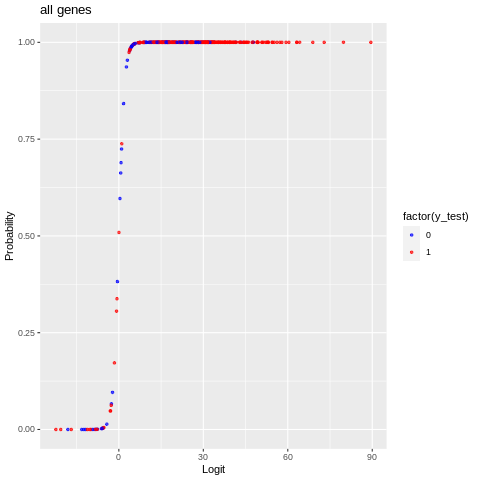

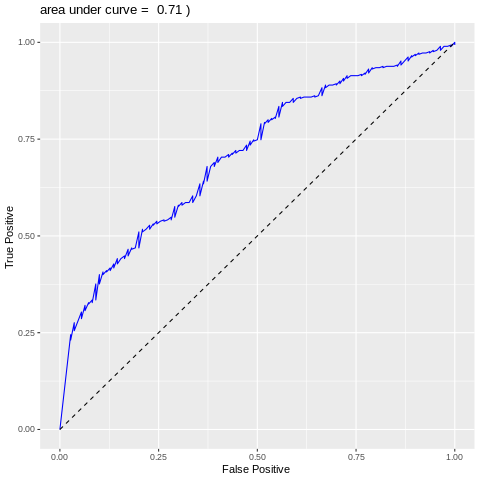

In [ ]:
%%R
library(ggplot2)
library(pROC)
# Sigmoid function
sigmoid <- function(a) {
  1 / (1 + exp(-a))
}
compute_gradient <- function(X, y, theta) {
  m <- length(y)
  h <- sigmoid(X %*% theta)
  gradient <- (1 / m) * colSums(matrix((h - y), nrow(X), ncol(X)) * X)# Compute gradient
  return(gradient)
}

compute_nll <- function(y, h) {
  -mean(y * log(pmax(h, 1e-10)) + (1 - y) * log(pmax(1 - h, 1e-10)))
}

fit_logistic_regression_with_nll <- function(X, y, lr = 0.0001, epochs = 100000) {
  n <- nrow(X)
  p <- ncol(X)
  X <- cbind(rep(1, n), X)  # Add a column of ones for the bias
  set.seed(428)

  theta <- runif(p + 1, 0, 0.001) # initialize the parametsre

  for (epoch in 1:epochs) {

    gradient <- compute_gradient(X, y, theta)

    # Update params
    theta <- theta - lr * gradient #* (1 - epoch / epochs)

    nll <- compute_nll(y, sigmoid(X %*% theta))

    if (epoch %% 500 == 0) { #print out a little report every now and then
      print(paste("Epoch", epoch, ", Avg Gradient Magnitude:", mean(abs(gradient)), "nll", nll))
    }
  }
  return(theta)
}


# Predict function
predict_logistic_regression <- function(X, theta) {
  X <- cbind(rep(1, nrow(X)), X)
  prob <- sigmoid(X %*% theta)
  prediction <- as.integer(prob > 0.5)
  return(list(prob = prob, prediction = prediction))
}


X <- expression  # input
y <- pathological_labels # outcome vaariable
print(paste('Dimensions of X:', dim(X)))
print(paste('Length of y:', length(y)))

# Split
set.seed(123)
trainIndex <- createDataPartition(y, p = 0.8, list = FALSE, times = 1) #   use the createDataPartition() function
print(paste('Length of trainIndex:', length(trainIndex)))
X_train <- X[trainIndex,]
X_test <- X[-trainIndex,]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]

# Fit
theta <- fit_logistic_regression_with_nll(X_train, y_train, lr = 0.001, epochs = 5000)


# Calculate predicted
y_pred_proba <- predict_logistic_regression(X_test, theta)$prob
y_pred <- predict_logistic_regression(X_test, theta)$prediction

# ROC curve
roc_data <- roc(y_test, y_pred_proba)
roc_auc <- auc(roc_data)
accuracy <- sum(y_pred == y_test) / length(y_test)
conf_mat <- table(y_test, y_pred)
f1 <- (2 * sum(y_test & y_pred)) / (sum(y_test) + sum(y_pred))

# Calculate the logit
logit_values <- as.numeric(X_test %*% theta[2:length(theta)]) + theta[1]
scatter_plot <- ggplot() +
  geom_point(aes(x=logit_values, y=y_pred_proba, color=factor(y_test)), alpha=0.7, size=1) +
  labs(x="Logit", y="Probability", title="all genes") +
  scale_color_manual(values = c("blue", "red"))
print(scatter_plot)

# Plot ROC
coords <- coords(roc_data, "all")
roc_plot <- ggplot() +
  geom_line(data=as.data.frame(coords), aes(x=1-specificity, y=sensitivity), color="blue") +
  geom_line(aes(x=c(0, 1), y=c(0, 1)), linetype="dashed") +
  labs(x='False Positive ', y='True Positive ', title=paste('area under curve = ', round(roc_auc, 2), ')'))
print(roc_plot)

# Print metrics
cat(paste("Accuracy: ", accuracy, "\n"))
cat("Confusion Matrix:\n")
print(conf_mat)
cat(paste("F1 Score: ", f1, "\n"))
